Imports

In [104]:
import neo
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd


Load the data

In [3]:
# load data fron this directory 
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"
filename_eye2 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5"
filename_eye3 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5"
filename_eye4 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5"
filename_eye5 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5"
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
reader = neo.io.BlackrockIO(filename=filename_eye2)

# Read the data from the file
block_SA = reader.read_block()

# Since there is only one segment, access it directly
segment_SA = block_SA.segments[0]

# Access the first analog signal within this segment
analog_signal_SA = segment_SA.analogsignals[0]

# Example: Print some information about the signal
print(f"Signal shape: {analog_signal_SA.shape}")
print(f"Signal units: {analog_signal_SA.units}")
print(f"Sampling rate: {analog_signal_SA.sampling_rate}")

# Access the signal data as a NumPy array
data_SA = np.asarray(analog_signal_SA.magnitude)
# print(f"First 10 data points: {data[:10]}")

Signal shape: (300300, 32)
Signal units: 1.0 uV
Sampling rate: 30000.0 Hz


In [ ]:
data_SA = np.asarray(analog_signal_SA.magnitude)

# Number of channels (assumed to be 32 in this case)
num_channels = data_SA.shape[1]
cmap = cm.get_cmap('hsv', num_channels)
# Create a figure for the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Loop through each channel and plot the distribution (single color)
for i in range(num_channels):
    color = cmap(i)  # Get a unique color for each channel
    sns.kdeplot(data_SA[:, i], color=color, label=f"Channel {i+1}", lw=2)

# Set x-axis range (adjust according to your data)
plt.xlim(-2000, 2000)  # Example: setting the range from -0.5 to 0.5

# Add labels and title
plt.title('Distributions of 32 Channels')
plt.xlabel('Signal Amplitude')
plt.ylabel('Density')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_7093/7970865.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Spectral', num_channels)  # Use a more vibrant colormap


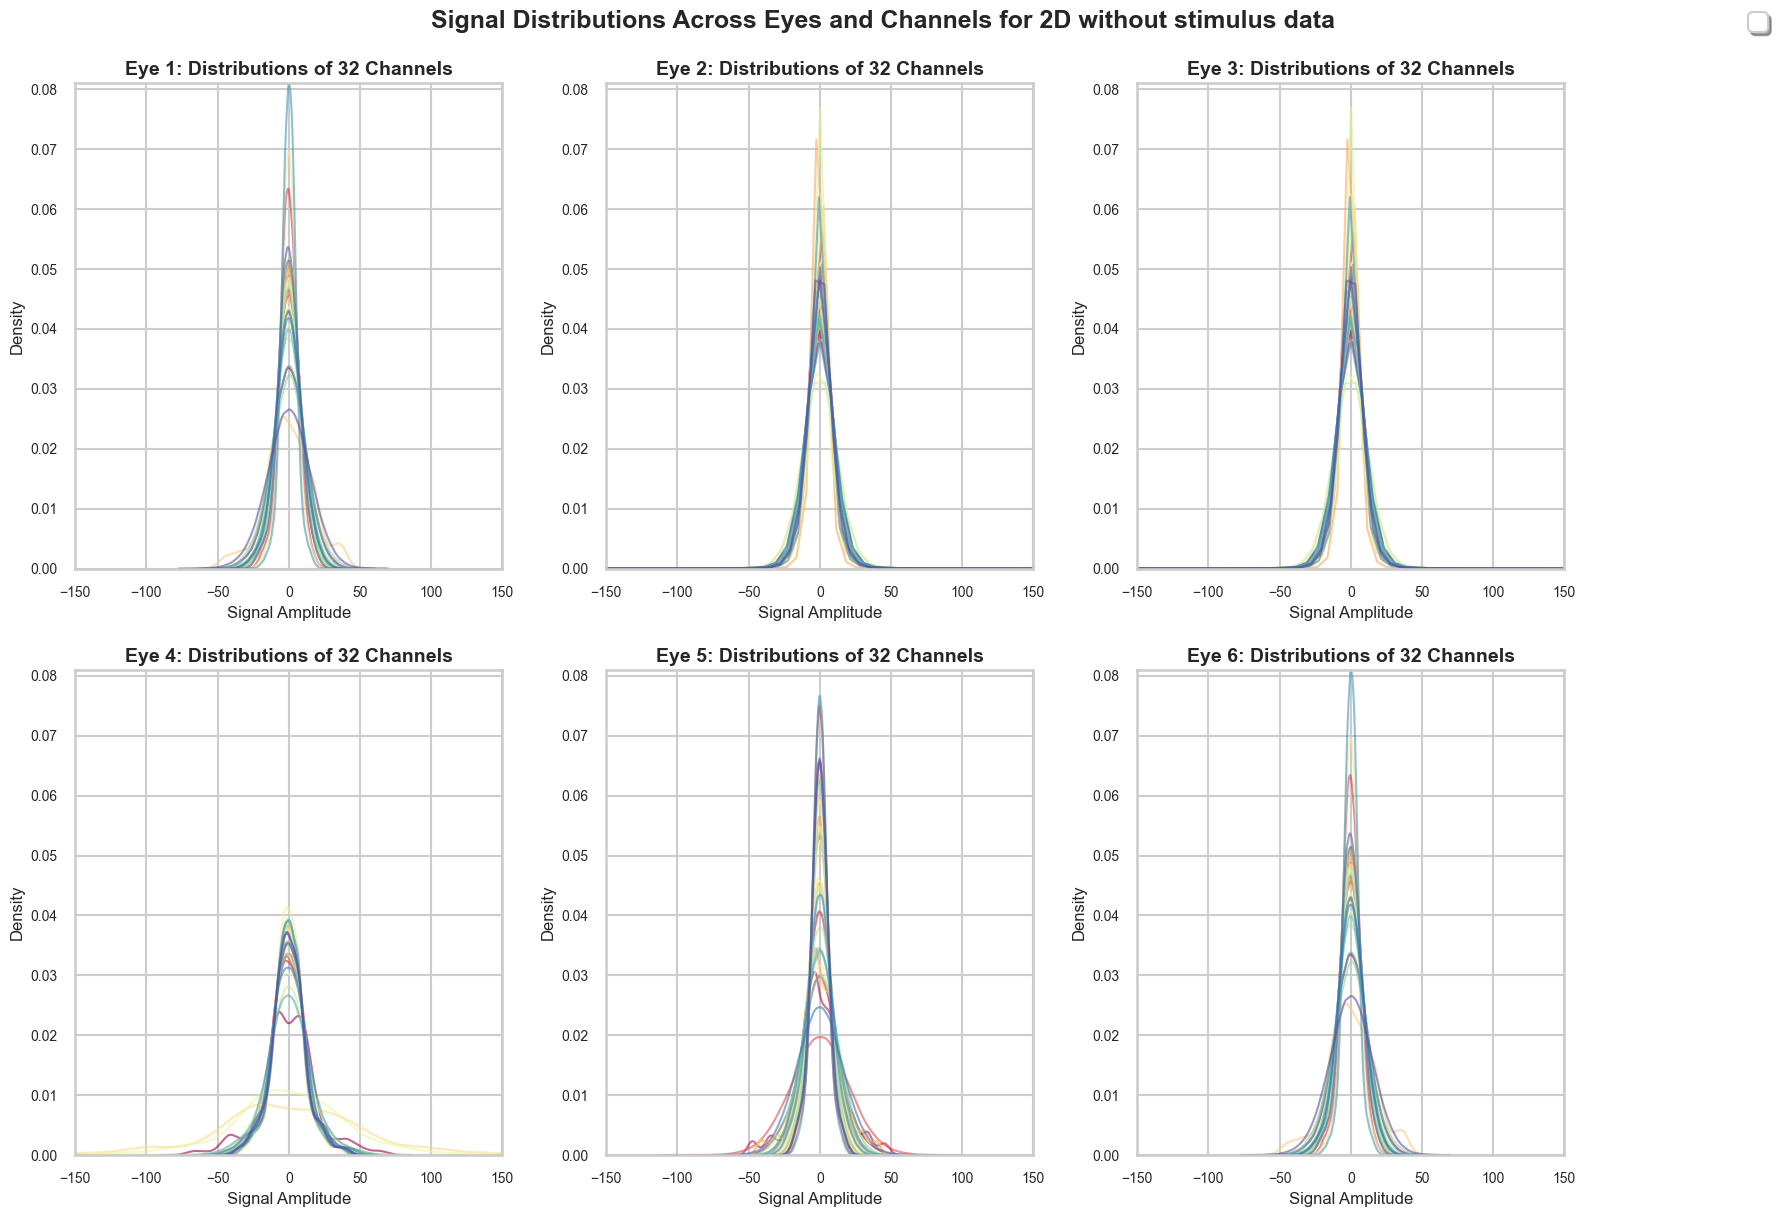

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import neo
from matplotlib import cm

# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/NO_STIM_NO_GEN004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/NO_STIM_NO_GEN004.ns5"
]

# Number of eyes
num_eyes = len(filenames)

# Create a figure for the subplots with a 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjusted dimensions for better readability
sns.set(style="whitegrid", context="talk")  # Set style and context for a cleaner plot

# Set the colormap for the channels
num_channels = 32
cmap = cm.get_cmap('Spectral', num_channels)  # Use a more vibrant colormap

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each eye and plot the distributions
all_densities = []  # To store all densities for setting y-axis limits
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Plot each channel in the current subplot
    for i in range(num_channels):
        color = cmap(i)
        # Calculate the KDE
        density = sns.kdeplot(data_SA[:, i], color=color, lw=1.5, ax=axes[idx], alpha=0.6).get_lines()[-1].get_ydata()
        all_densities.append(density)  # Store the density

    # Set subplot title and labels
    axes[idx].set_title(f'Eye {idx + 1}: Distributions of 32 Channels', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Signal Amplitude', fontsize=12)
    axes[idx].set_ylabel('Density', fontsize=12)
    axes[idx].set_xlim(-150, 150)  # Adjust according to your data
    axes[idx].tick_params(axis='both', which='major', labelsize=10)

# Set uniform y-axis limits based on the maximum density across all plots
max_density = np.max([np.max(density) for density in all_densities])
for ax in axes:
    ax.set_ylim(0, max_density)  # Set same y-limits for all axes

# Create a single legend for all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='medium', frameon=True, shadow=True)

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the legend
fig.suptitle('Signal Distributions Across Eyes and Channels for 2D without stimulus data', fontsize=18, fontweight='bold', y=1.02)

# Show the plot
plt.show()


In [ ]:
import neo
import numpy as np
import scipy.stats as stats

# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/NO_STIM_NO_GEN002.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/NO_STIM_NO_GEN016.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/NO_STIM_NO_GEN007.ns5"
]

# Number of channels (assuming 32 channels)
num_channels = 32

# Initialize an array to hold the average distribution for K-S test
avg_distribution = []

# Loop through each eye
for idx, filename in enumerate(filenames):
    avg_distribution = []
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Initialize an array to hold all channel data
    channel_data = []

    # Extract data for each channel
    for i in range(num_channels):
        channel_data.append(data_SA[:, i])  # Assuming data_SA is shaped (300300, 32)

    # Convert to a numpy array for easier manipulation
    channel_data = np.array(channel_data)

    # Append channel data to avg_distribution for later analysis
    avg_distribution.append(np.mean(channel_data, axis=0))  # Store the mean for each channel

    # Print a message indicating successful read
    print(f"Data successfully read for Eye {idx + 1}.")

    # Calculate the overall average distribution after reading all files
    avg_distribution = np.mean(avg_distribution, axis=0)

    # Perform one-sample K-S test for each channel against the average distribution
    ks_results = []
    for i in range(num_channels):
        # The reference distribution for the K-S test is the average distribution
        ks_stat, p_value = stats.ks_1samp(channel_data[i], lambda x: stats.norm.cdf(x, loc=np.mean(avg_distribution), scale=np.std(avg_distribution)))
        ks_results.append((i, ks_stat, p_value))

    # Print results
    print("Results for K-S Test against Overall Average Distribution:")
    for channel, ks_stat, p_value in ks_results:
        print(f"Channel {channel + 1}: KS Statistic = {ks_stat:.4f}, p-value = {p_value:.4f}")


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_7093/2745005841.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Spectral', num_channels)  # Use a more vibrant colormap


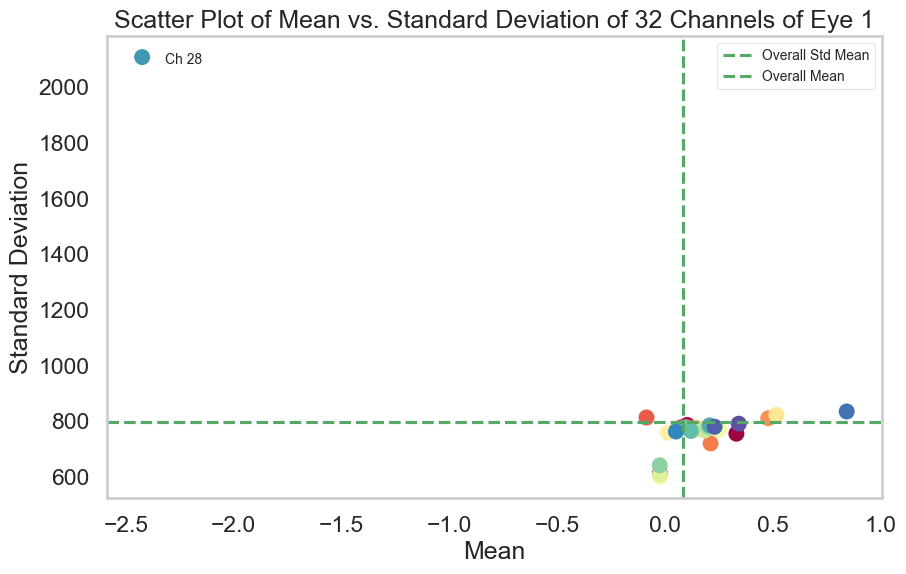

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import neo
from matplotlib import cm

# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"
]

# Set the colormap for the channels
num_channels = 32
cmap = cm.get_cmap('Spectral', num_channels)  # Use a more vibrant colormap

# Initialize lists to store mean and std for each channel
mean_values = []
std_values = []

# Loop through each eye and calculate the mean and std for each channel
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Calculate mean and std for each channel
    means = np.mean(data_SA, axis=0)
    stds = np.std(data_SA, axis=0)

    mean_values.append(means)
    std_values.append(stds)

# Convert lists to arrays for easier handling
mean_values = np.array(mean_values)
std_values = np.array(std_values)

# Calculate overall mean and std for each channel across all files
overall_mean = np.mean(mean_values, axis=0)
overall_std = np.mean(std_values, axis=0)

# Calculate overall mean and std excluding channel 28 (index 27)
means_excluding_28 = np.delete(mean_values, 27, axis=1)
stds_excluding_28 = np.delete(std_values, 27, axis=1)

overall_mean_excluding_28 = np.mean(means_excluding_28, axis=0)
overall_std_excluding_28 = np.mean(stds_excluding_28, axis=0)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(overall_mean, overall_std, color=cmap(np.arange(num_channels)), s=100)

# Annotate only channel 28
plt.annotate(f'Ch 28', (overall_mean[27], overall_std[27]), textcoords="offset points", xytext=(30,-5), ha='center', fontsize=10)

# Add lines for the overall mean and std
plt.axhline(y=np.mean(overall_std), color='g', linestyle='--', label='Overall Std Mean')
plt.axvline(x=np.mean(overall_mean), color='g', linestyle='--', label='Overall Mean')

# Add a legend with a white background and smaller font size
legend = plt.legend(fontsize='10')  # Set fontsize to 'small'
frame = legend.get_frame()
frame.set_facecolor('white')  # Set legend background to white
frame.set_linewidth(0.5)  # Set border line width

plt.title('Scatter Plot of Mean vs. Standard Deviation of 32 Channels of Eye 1')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.grid()
plt.show()


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_7093/248171293.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', 6)  # tab10 has distinct colors, useful for multiple eyes


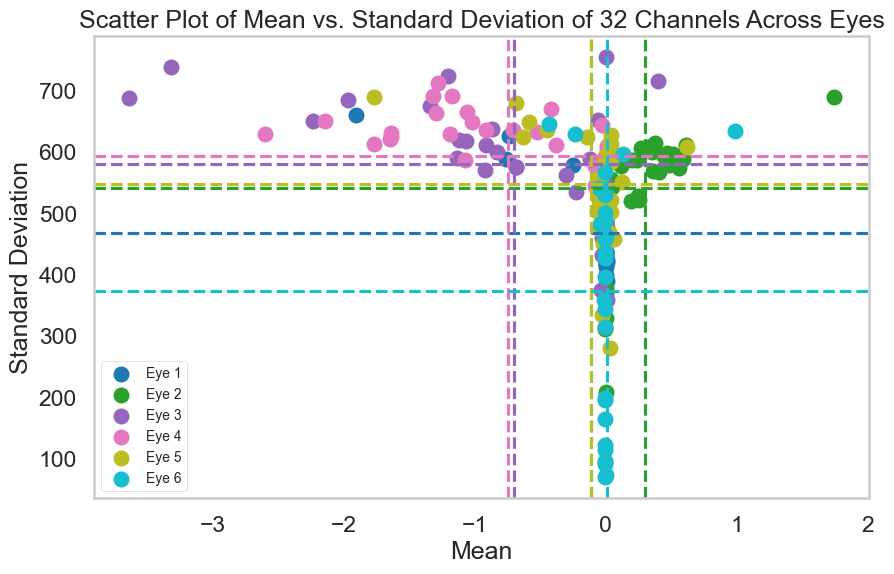

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import neo
from matplotlib import cm

# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Define colors for each eye
colormap = cm.get_cmap('tab10', 6)  # tab10 has distinct colors, useful for multiple eyes

# Initialize lists to store mean and std for each channel
all_mean_values = []
all_std_values = []

# Loop through each eye and calculate the mean and std for each channel
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Calculate mean and std for each channel
    means = np.mean(data_SA, axis=0)
    stds = np.std(data_SA, axis=0)

    all_mean_values.append(means)
    all_std_values.append(stds)

# Convert lists to arrays for easier handling
all_mean_values = np.array(all_mean_values)
all_std_values = np.array(all_std_values)

# Create a figure for the scatter plots
plt.figure(figsize=(10, 6))

# Loop again to plot each eye
for idx in range(len(filenames)):
    plt.scatter(all_mean_values[idx], all_std_values[idx], color=colormap(idx), s=100, label=f'Eye {idx + 1}')

    overall_mean = np.mean(all_mean_values[idx])
    overall_std = np.mean(all_std_values[idx])
    plt.axhline(y=np.mean(overall_std), color=colormap(idx), linestyle='--')
    plt.axvline(x=np.mean(overall_mean), color=colormap(idx), linestyle='--')

# Add a legend with a white background and smaller font size
legend = plt.legend(fontsize='10')
frame = legend.get_frame()
frame.set_facecolor('white')  # Set legend background to white
frame.set_linewidth(0.5)  # Set border line width

plt.title('Scatter Plot of Mean vs. Standard Deviation of 32 Channels Across Eyes')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.grid()
plt.show()


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_7093/1576071986.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', 6)  # tab10 has distinct colors, useful for multiple eyes


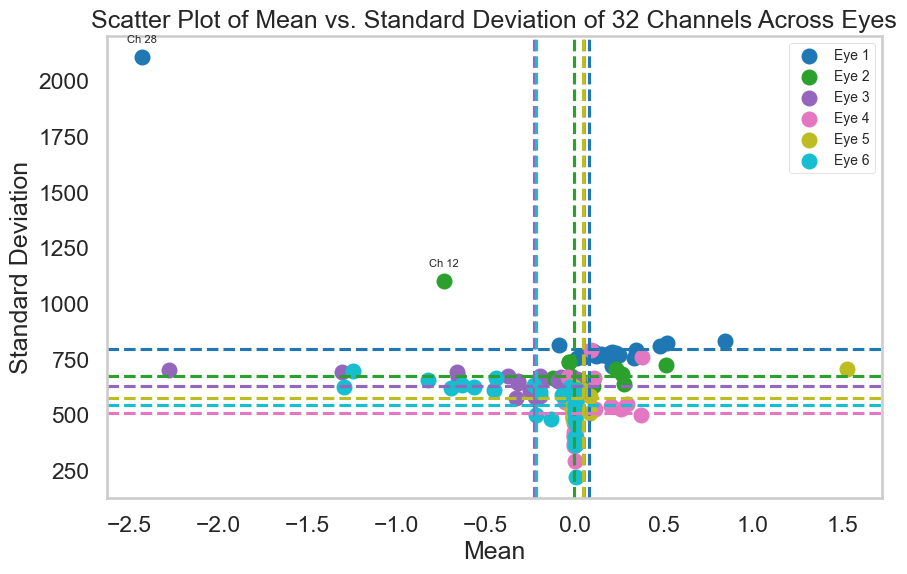

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import neo
from matplotlib import cm

# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Get the 'tab10' colormap to assign distinct colors for each eye
colormap = cm.get_cmap('tab10', 6)  # tab10 has distinct colors, useful for multiple eyes

# Initialize lists to store mean and std for each channel
all_mean_values = []
all_std_values = []

# Loop through each eye and calculate the mean and std for each channel
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Calculate mean and std for each channel
    means = np.mean(data_SA, axis=0)
    stds = np.std(data_SA, axis=0)

    all_mean_values.append(means)
    all_std_values.append(stds)

# Convert lists to arrays for easier handling
all_mean_values = np.array(all_mean_values)
all_std_values = np.array(all_std_values)

# Create a figure for the scatter plots
plt.figure(figsize=(10, 6))

# Loop again to plot each eye
for idx in range(len(filenames)):
    plt.scatter(all_mean_values[idx], all_std_values[idx], color=colormap(idx), s=100, label=f'Eye {idx + 1}')

    overall_mean = np.mean(all_mean_values[idx])
    overall_std = np.mean(all_std_values[idx])
    plt.axhline(y=np.mean(overall_std), color=colormap(idx), linestyle='--')
    plt.axvline(x=np.mean(overall_mean), color=colormap(idx), linestyle='--')

# Annotate specific channels for Eye 1 and Eye 2
if len(filenames) > 0:  # Check if Eye 1 exists
    plt.annotate('Ch 28', (all_mean_values[0][27], all_std_values[0][27]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
if len(filenames) > 1:  # Check if Eye 2 exists
    plt.annotate('Ch 12', (all_mean_values[1][11], all_std_values[1][11]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Add a legend with a white background and smaller font size
legend = plt.legend(fontsize='10')
frame = legend.get_frame()
frame.set_facecolor('white')  # Set legend background to white
frame.set_linewidth(0.5)  # Set border line width

plt.title('Scatter Plot of Mean vs. Standard Deviation of 32 Channels Across Eyes')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.grid()
plt.show()


In [ ]:
# List of filenames for each eye
filenames = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Number of eyes
num_eyes = len(filenames)

# Create a figure for the subplots with a 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 18))
sns.set(style="whitegrid")

# Set the colormap for the channels
num_channels = 32
cmap = cm.get_cmap('hsv', num_channels)

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each eye and plot the distributions
for idx, filename in enumerate(filenames):
    # Read the data from the file
    reader = neo.io.BlackrockIO(filename=filename)
    block = reader.read_block()
    segment = block.segments[0]
    analog_signal = segment.analogsignals[0]
    data_SA = np.asarray(analog_signal.magnitude)

    # Normalize the data channel-wise
    data_SA_normalized = (data_SA - np.mean(data_SA, axis=0)) / np.std(data_SA, axis=0)

    # Plot each channel in the current subplot
    for i in range(num_channels):
        color = cmap(i)
        sns.kdeplot(data_SA_normalized[:, i], color=color, lw=2, ax=axes[idx], alpha=0.5)

    # Calculate and plot the overall distribution for the current eye
    overall_data_normalized = data_SA_normalized.flatten()
    sns.kdeplot(overall_data_normalized, color='black', lw=3, ax=axes[idx], label='Overall Distribution')

    # Set subplot title and labels
    axes[idx].set_title(f'Normalized Distributions of 32 Channels for Eye {idx + 1}')
    axes[idx].set_xlabel('Normalized Signal Amplitude')
    axes[idx].set_ylabel('Density')
    axes[idx].set_xlim(-4, 4)  # Adjust according to normalized data range

# Create a single legend for all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='medium')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


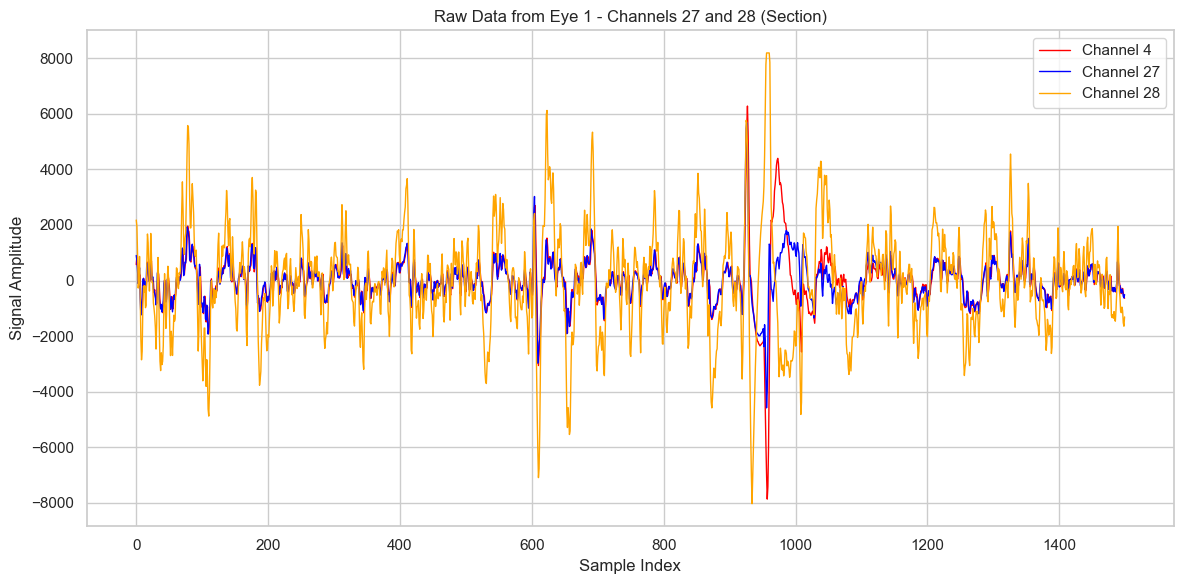

In [74]:
# Filename for Eye 1
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# Read the data from the file
reader = neo.io.BlackrockIO(filename=filename_eye1)
block = reader.read_block()
segment = block.segments[0]
analog_signal = segment.analogsignals[0]
data_SA = np.asarray(analog_signal.magnitude)

# Select channels 27 and 28 (zero-indexed)
channel_27 = data_SA[:, 26]  # Channel 27 (index 26)
channel_28 = data_SA[:, 27]  # Channel 28 (index 27)

# Define the range to plot (e.g., samples 1000 to 2000)
start_sample = 0
end_sample = 1500

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot channel 4
plt.plot(range(start_sample, end_sample), data_SA[:, 3][start_sample:end_sample], label='Channel 4', color='red', lw=1)

# Plot channel 27
plt.plot(range(start_sample, end_sample), channel_27[start_sample:end_sample], label='Channel 27', color='blue', lw=1)

# Plot channel 28
plt.plot(range(start_sample, end_sample), channel_28[start_sample:end_sample], label='Channel 28', color='orange', lw=1)

# Add labels and title
plt.title('Raw Data from Eye 1 - Channels 27 and 28 (Section)')
plt.xlabel('Sample Index')
plt.ylabel('Signal Amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


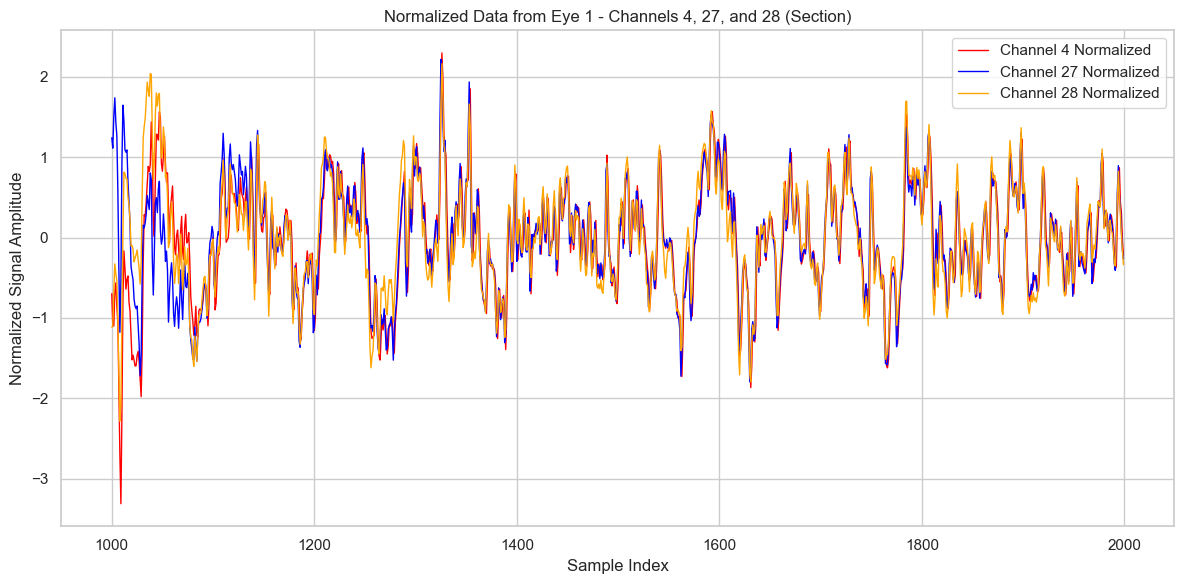

In [79]:
import numpy as np
import neo
import matplotlib.pyplot as plt

# Filename for Eye 1
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# Read the data from the file
reader = neo.io.BlackrockIO(filename=filename_eye1)
block = reader.read_block()
segment = block.segments[0]
analog_signal = segment.analogsignals[0]
data_SA = np.asarray(analog_signal.magnitude)

# Normalize each channel (mean normalization within each channel)
data_SA_normalized = (data_SA - np.mean(data_SA, axis=0)) / np.std(data_SA, axis=0, ddof=1)

# Select channels 4, 27, and 28 (zero-indexed)
channel_4_normalized = data_SA_normalized[:, 3]  # Channel 4 (index 3)
channel_27_normalized = data_SA_normalized[:, 26]  # Channel 27 (index 26)
channel_28_normalized = data_SA_normalized[:, 27]  # Channel 28 (index 27)

# Define the range to plot (e.g., samples 1000 to 2000)
start_sample = 1000
end_sample = 2000

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot normalized channel 4
plt.plot(range(start_sample, end_sample), channel_4_normalized[start_sample:end_sample], label='Channel 4 Normalized', color='red', lw=1)

# Plot normalized channel 27
plt.plot(range(start_sample, end_sample), channel_27_normalized[start_sample:end_sample], label='Channel 27 Normalized', color='blue', lw=1)

# Plot normalized channel 28
plt.plot(range(start_sample, end_sample), channel_28_normalized[start_sample:end_sample], label='Channel 28 Normalized', color='orange', lw=1)

# Add labels and title
plt.title('Normalized Data from Eye 1 - Channels 4, 27, and 28 (Section)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Signal Amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


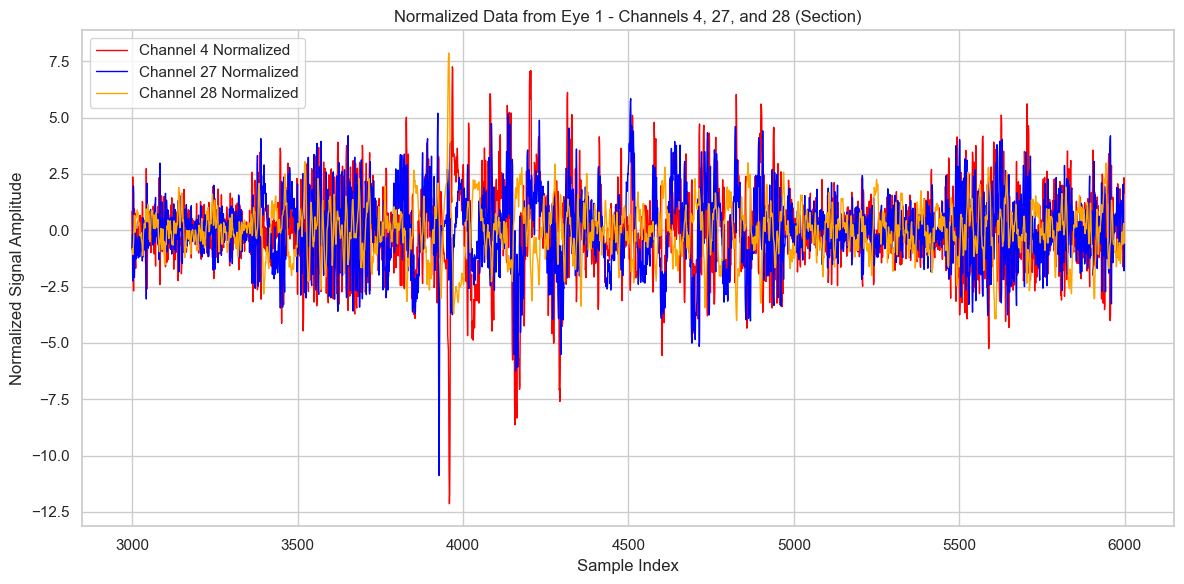

In [86]:
import numpy as np
import neo
import matplotlib.pyplot as plt

# Filename for Eye 1
filename_eye1 = "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# Read the data from the file
reader = neo.io.BlackrockIO(filename=filename_eye1)
block = reader.read_block()
segment = block.segments[0]
analog_signal = segment.analogsignals[0]
data_SA = np.asarray(analog_signal.magnitude)

# Calculate the mean across all channels for each time point
mean_across_channels = np.mean(data_SA, axis=1)

# Subtract the mean from each channel
data_SA_centered = data_SA - mean_across_channels[:, np.newaxis]

# Normalize each channel (mean normalization within each channel)
data_SA_normalized = (data_SA_centered - np.mean(data_SA_centered, axis=0)) / np.std(data_SA_centered, axis=0, ddof=1)

# Select channels 4, 27, and 28 (zero-indexed)
channel_4_normalized = data_SA_normalized[:, 3]  # Channel 4 (index 3)
channel_27_normalized = data_SA_normalized[:, 26]  # Channel 27 (index 26)
channel_28_normalized = data_SA_normalized[:, 27]  # Channel 28 (index 27)

# Define the range to plot (e.g., samples 1000 to 2000)
start_sample = 3000
end_sample = 6000

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot normalized channel 4
plt.plot(range(start_sample, end_sample), channel_4_normalized[start_sample:end_sample], label='Channel 4 Normalized', color='red', lw=1)

# Plot normalized channel 27
plt.plot(range(start_sample, end_sample), channel_27_normalized[start_sample:end_sample], label='Channel 27 Normalized', color='blue', lw=1)

# Plot normalized channel 28
plt.plot(range(start_sample, end_sample), channel_28_normalized[start_sample:end_sample], label='Channel 28 Normalized', color='orange', lw=1)

# Add labels and title
plt.title('Normalized Data from Eye 1 - Channels 4, 27, and 28 (Section)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Signal Amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
